In [8]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def shell_sort(arr):
    n = len(arr)
    gap = 1
    while gap < n / 3:
        gap = 3 * gap + 1

    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 3

In [10]:
def generate_random_array(size):
    return [random.randint(0, 65535) for _ in range(size)]

In [11]:
def measure_time(func, *args):
    start_time = time.time()
    func(*args)
    return time.time() - start_time

In [12]:
def plot_results(sizes, times):
    plt.figure(figsize=(10, 6))
    plt.plot(np.log2(sizes), np.log2(times), marker='o', linestyle='-', color='b')
    plt.title('Shell Sort Performance')
    plt.xlabel('log(n)')
    plt.ylabel('log(T(n))')
    plt.show()

In [16]:
def main():
    sizes = [10000, 30000, 90000, 270000, 810000]
    times = []

    for size in sizes:
        arr = generate_random_array(size)
        elapsed_time = measure_time(shell_sort, arr)
        times.append(elapsed_time)

        print(f'Sorted array of size {size} in {elapsed_time:.6f} seconds.')

    plot_results(sizes, times)

Sorted array of size 10000 in 0.021189 seconds.
Sorted array of size 30000 in 0.074308 seconds.
Sorted array of size 90000 in 0.291955 seconds.
Sorted array of size 270000 in 1.157369 seconds.
Sorted array of size 810000 in 5.070919 seconds.


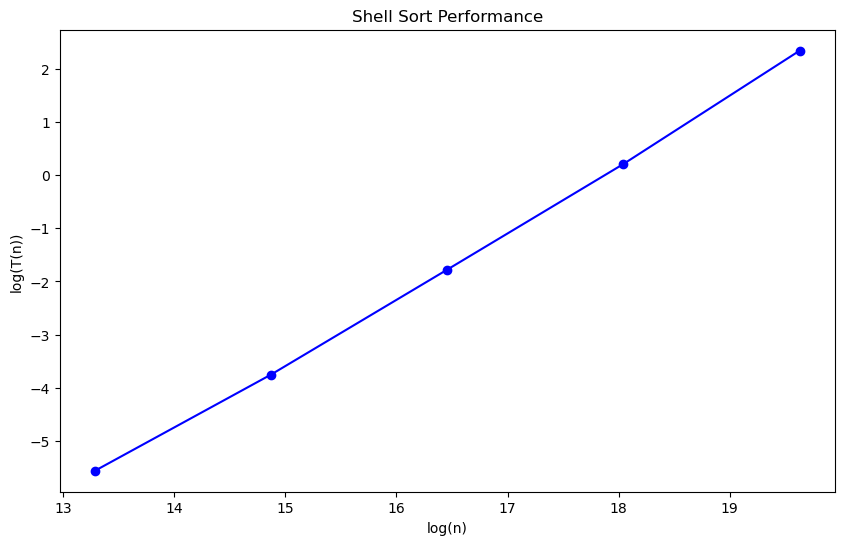

In [17]:
if __name__ == "__main__":
    main()

In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def shell_insertion_sort(arr):
    n = len(arr)
    gap = n // 2

    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 2

In [3]:
def generate_random_array(size):
    return [random.randint(0, 65535) for _ in range(size)]

In [4]:
def measure_time(func, *args):
    start_time = time.time()
    func(*args)
    return time.time() - start_time

In [5]:
def plot_results(sizes, times):
    plt.figure(figsize=(10, 6))
    plt.plot(np.log2(sizes), np.log2(times), marker='o', linestyle='-', color='b')
    plt.title('Shell Insertion Sort Performance')
    plt.xlabel('log(n)')
    plt.ylabel('log(T(n))')
    plt.show()

In [6]:
def main():
    sizes = [10000, 30000, 90000, 270000, 810000]
    times = []

    for size in sizes:
        arr = generate_random_array(size)
        elapsed_time = measure_time(shell_insertion_sort, arr)
        times.append(elapsed_time)

        print(f'Sorted array of size {size} in {elapsed_time:.6f} seconds.')

    plot_results(sizes, times)

Sorted array of size 10000 in 0.029329 seconds.
Sorted array of size 30000 in 0.070106 seconds.
Sorted array of size 90000 in 0.282519 seconds.
Sorted array of size 270000 in 1.329502 seconds.
Sorted array of size 810000 in 5.964279 seconds.


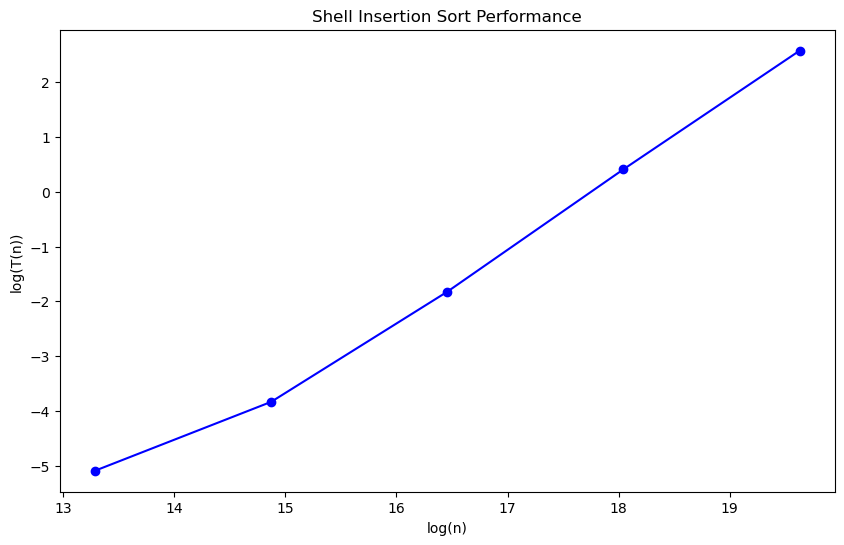

In [7]:
if __name__ == "__main__":
    main()

In [18]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def radix_lsd_sort(arr, base):
    def counting_sort(arr, exp):
        n = len(arr)
        output = [0] * n
        count = [0] * base

        for i in range(n):
            index = (arr[i] // exp) % base
            count[index] += 1

        for i in range(1, base):
            count[i] += count[i - 1]

        i = n - 1
        while i >= 0:
            index = (arr[i] // exp) % base
            output[count[index] - 1] = arr[i]
            count[index] -= 1
            i -= 1

        for i in range(n):
            arr[i] = output[i]

    max_num = max(arr)
    exp = 1
    while max_num // exp > 0:
        counting_sort(arr, exp)
        exp *= base

In [20]:
def generate_random_array(size):
    return [random.randint(0, 65535) for _ in range(size)]

In [21]:
def measure_time(func, *args):
    start_time = time.time()
    func(*args)
    return time.time() - start_time

In [22]:
def plot_results(sizes, times):
    plt.figure(figsize=(10, 6))
    plt.plot(np.log2(sizes), np.log2(times), marker='o', linestyle='-', color='b')
    plt.title('Shell RadixLSD Sort Performance')
    plt.xlabel('log(n)')
    plt.ylabel('log(T(n))')
    plt.show()

In [23]:
def main():
    sizes = [10000, 30000, 90000, 270000, 810000]
    base = 10  

    times = []

    for size in sizes:
        arr = generate_random_array(size)
        elapsed_time = measure_time(radix_lsd_sort, arr, base)
        times.append(elapsed_time)

        print(f'Sorted array of size {size} in {elapsed_time:.6f} seconds.')

    plot_results(sizes, times)

Sorted array of size 10000 in 0.018047 seconds.
Sorted array of size 30000 in 0.040869 seconds.
Sorted array of size 90000 in 0.134289 seconds.
Sorted array of size 270000 in 0.484447 seconds.
Sorted array of size 810000 in 2.134377 seconds.


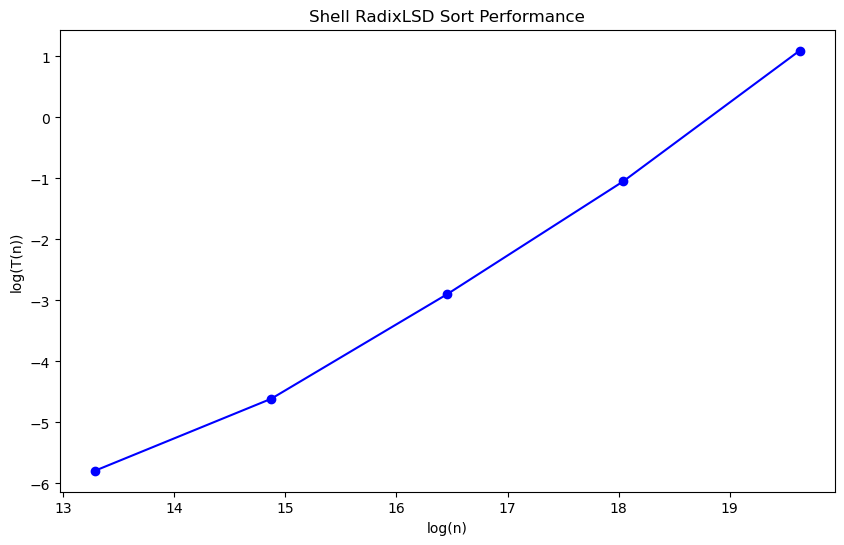

In [24]:
if __name__ == "__main__":
    main()

In [25]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def plot_results(sizes, times_shell, times_insertion, times_radix_lsd):
    plt.figure(figsize=(10, 6))
    plt.plot(np.log2(sizes), np.log2(times_shell), marker='o', linestyle='-', color='b', label='Shell Sort')
    plt.plot(np.log2(sizes), np.log2(times_insertion), marker='o', linestyle='-', color='r', label='Insertion Sort')
    plt.plot(np.log2(sizes), np.log2(times_radix_lsd), marker='o', linestyle='-', color='g', label='RadixLSD Sort')
    plt.title('Comparison of Sorting Algorithms')
    plt.xlabel('log(n)')
    plt.ylabel('log(T(n))')
    plt.legend()
    plt.show()

In [32]:
def main():
    sizes = [10000, 30000, 90000, 270000, 810000]
    base_radix_lsd = 10  # Основа системи счислення для RadixLSD

    times_shell = []
    times_insertion = []
    times_radix_lsd = []

    for size in sizes:
        arr_shell = generate_random_array(size)
        arr_insertion = arr_shell.copy()
        arr_radix_lsd = arr_shell.copy()

        elapsed_time_shell = measure_time(shell_sort, arr_shell)
        elapsed_time_insertion = measure_time(insertion_sort, arr_insertion)
        elapsed_time_radix_lsd = measure_time(radix_lsd_sort, arr_radix_lsd, base_radix_lsd)

        times_shell.append(elapsed_time_shell)
        times_insertion.append(elapsed_time_insertion)
        times_radix_lsd.append(elapsed_time_radix_lsd)

        print(f'Sorted arrays of size {size} in {elapsed_time_shell:.6f} (Shell), {elapsed_time_insertion:.6f} (Insertion), {elapsed_time_radix_lsd:.6f} (RadixLSD) seconds.')

    plot_results(sizes, times_shell, times_insertion, times_radix_lsd)

Sorted arrays of size 10000 in 0.024341 (Shell), 1.606517 (Insertion), 0.012958 (RadixLSD) seconds.
Sorted arrays of size 30000 in 0.066568 (Shell), 14.412413 (Insertion), 0.046868 (RadixLSD) seconds.
Sorted arrays of size 90000 in 0.283948 (Shell), 127.968069 (Insertion), 0.109365 (RadixLSD) seconds.
Sorted arrays of size 270000 in 1.221395 (Shell), 1388.856163 (Insertion), 0.484558 (RadixLSD) seconds.
Sorted arrays of size 810000 in 5.004226 (Shell), 22162.005357 (Insertion), 2.031020 (RadixLSD) seconds.


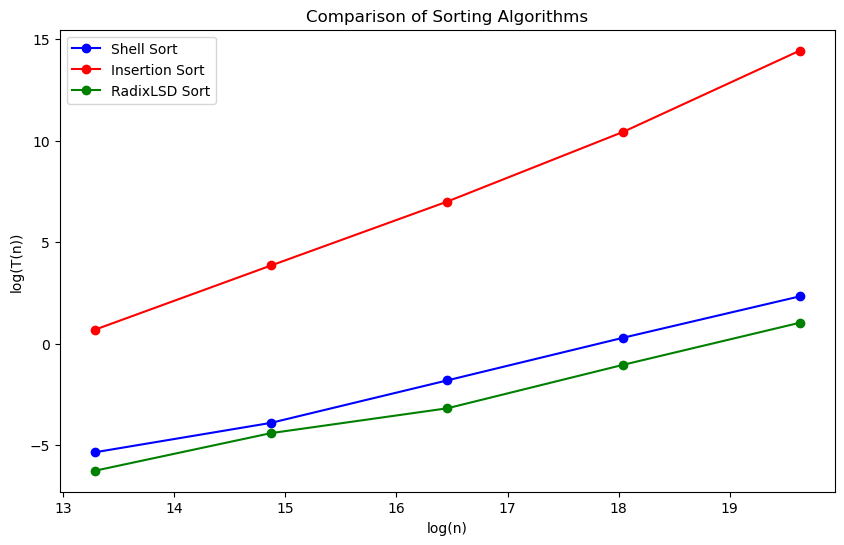

In [33]:
if __name__ == "__main__":
    main()